In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import os
import cv2

In [2]:
#params initialisation
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [3]:
#sigmoide 
def modele(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-np.clip(Z, -500, 500)))
    return A

In [4]:
#loss function
def fct_cout(A, y):
    e = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A+e) - (1 - y) * np.log(1 - A+e))

In [5]:
#gradient (descent de gradient)
def gradient(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [6]:
#params updating
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [7]:
def prediction(X, W, b):
    A = modele(X, W, b)
    #print(A)
    return A >= 0.5

In [8]:
#full structure of our perceptron
def perceptron(X, y, learning_rate = 0.1, n_iter = 1000):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = modele(X, W, b)
        Loss.append(fct_cout(A, y))
        dW, db = gradient(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    
    y_pred = prediction(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

In [9]:
def load_images(folder_path, label):
    images = []
    labels = []
    i = 0
    for filename in os.listdir(folder_path):
        if filename.endswith((".jpg", ".png")):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (256, 256))  
            images.append(image.flatten()) 
            labels.append(label)
            i = i + 1
            if i == 300 :
                break
    return images, labels

cat_folder = "Cat_train"
cat_images, cat_labels = load_images(cat_folder, 0)

dog_folder = "Dog_train"
dog_images, dog_labels = load_images(dog_folder, 1)

X_train = np.concatenate((cat_images, dog_images), axis=0)
y_train = np.concatenate((cat_labels, dog_labels))

cat_folder = "Cat_test"
cat_images, cat_labels = load_images(cat_folder, 0)

dog_folder = "Dog_test"
dog_images, dog_labels = load_images(dog_folder, 1)

X_test = np.concatenate((cat_images, dog_images), axis=0)
y_test = np.concatenate((cat_labels, dog_labels))

X = np.concatenate((X_train, X_test), axis=0)/X_train.max()
y = np.concatenate((y_train, y_test))
y = y.reshape(y.shape[0], 1)

In [10]:
#normalisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
print(X.shape)
print(y.shape)
print(X)

(800, 65536)
(800, 1)
[[ 2.11055192  2.11385122  2.09640261 ... -0.0721025   0.02378218
  -0.01333263]
 [ 0.61854766  0.61449316  0.60275963 ...  0.28465992  0.70559216
   0.63212017]
 [-0.05285425 -0.19516019  0.24428531 ... -1.3532039  -1.33983778
  -1.3526472 ]
 ...
 [ 0.3499869  -0.18016661 -0.4129176  ... -0.02345307 -0.70672851
  -1.33651088]
 [ 0.99154873  1.00432625  0.9911068  ...  0.2360105   0.3484536
   0.11575793]
 [-0.09761438 -0.12019229 -0.1589983  ...  0.2360105   0.28351932
   0.32553009]]


1.0


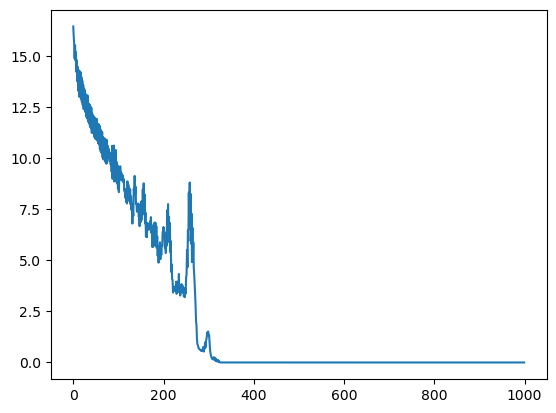

In [12]:
W, b = perceptron(X, y)

In [59]:
# Charger une nouvelle image à tester
test_image_path = "40.png"
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (256, 256))  
test_image_flattened = test_image.flatten().reshape(1, -1) 
#print(test_image_flattened.shape)
# Faire la prédiction avec le modèle
if not prediction(test_image_flattened, W, b) :
    ys = 'Cat' 
else :
    ys = 'Dog'
print(ys)

Cat
